### predict total sales based on money spend for advertising

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('Advertising.csv')

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [51]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [52]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [53]:
df


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Basic checks

In [55]:
df.shape

(200, 4)

In [56]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [57]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [59]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [60]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [61]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1996\938833690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'],kde=True)


<Axes: xlabel='TV', ylabel='Density'>

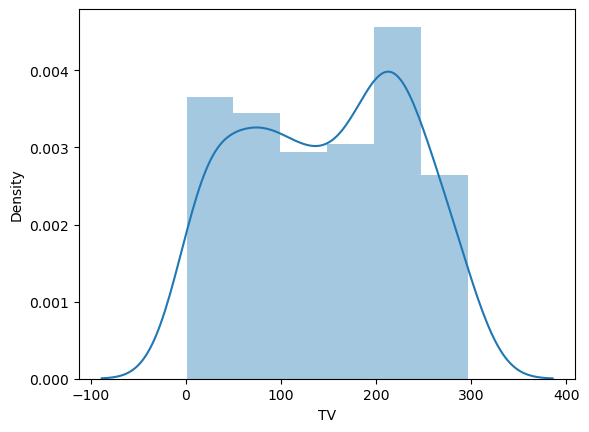

In [62]:
sns.distplot(df['TV'],kde=True)

### insights
#### it shows bimodal distribution (has two peaks one arround 50-100 and 200-250)
####  this bimodal shows two types of spending one is low budget spending and other is high budget spending
#### spending is between 0-300 with 296 being highest


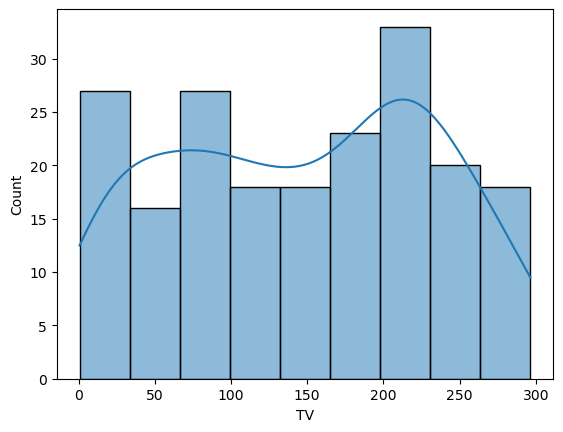

In [64]:
sns.histplot(df['TV'],kde=True)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1996\433466462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['radio'],kde=True)


<Axes: xlabel='radio', ylabel='Density'>

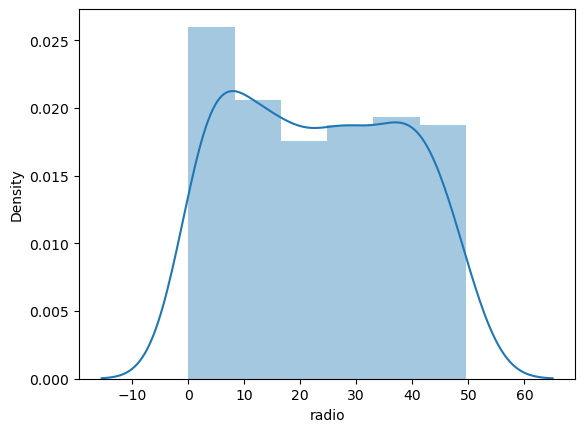

In [65]:
sns.distplot(df['radio'],kde=True)

In [66]:
df.TV.skew()

-0.06985336213274573

## Insights
#### spending between 0-50 highest is 49.60
#### the curve has two peaks i.e bimodal suggests two type of spendings

<Axes: xlabel='radio', ylabel='Count'>

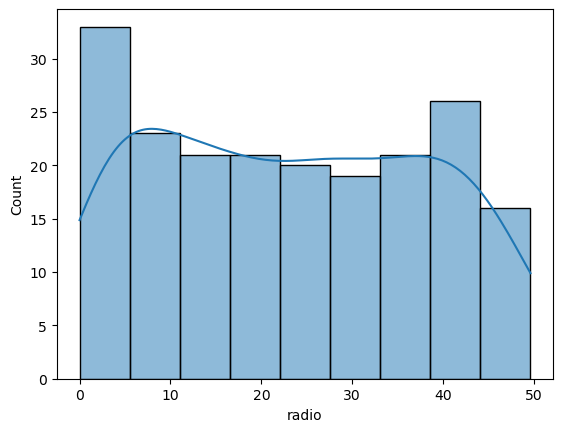

In [68]:
sns.histplot(df['radio'],kde=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1996\2220208212.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['newspaper'],kde=True)


<Axes: xlabel='newspaper', ylabel='Density'>

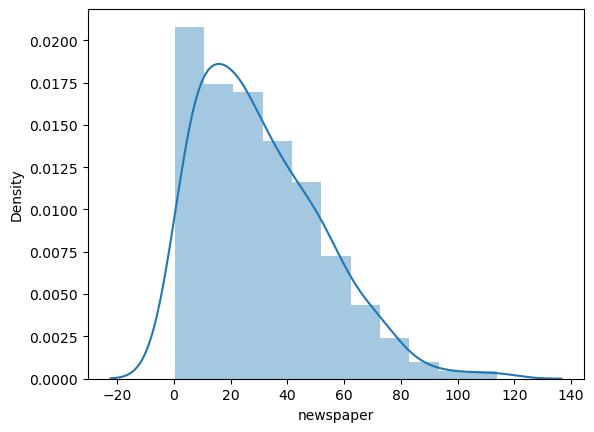

In [69]:
sns.distplot(df['newspaper'],kde=True)

In [70]:
df.newspaper.skew()

0.8947204074986175

## Insights
### right or positive skewed distribution , one peak , i.e max spending between 15-25
### spending between 0-114
### has outliers as their is tail on right

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1996\612349473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'],kde=True)


<Axes: xlabel='sales', ylabel='Density'>

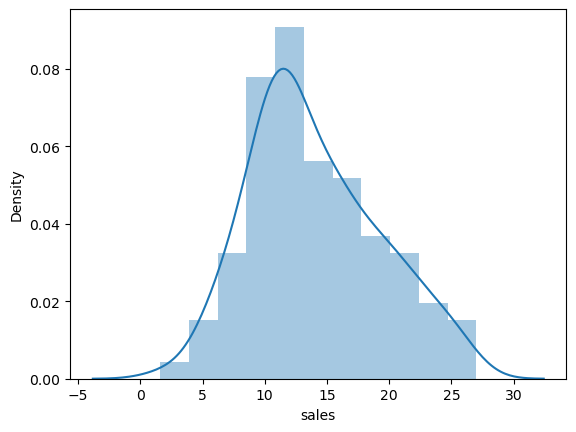

In [72]:
sns.distplot(df['sales'],kde=True)

In [73]:
df.sales.skew()

0.4075714250767127

## Insights
### It show normal distribution
### peak between 10-13

<Axes: xlabel='sales', ylabel='Count'>

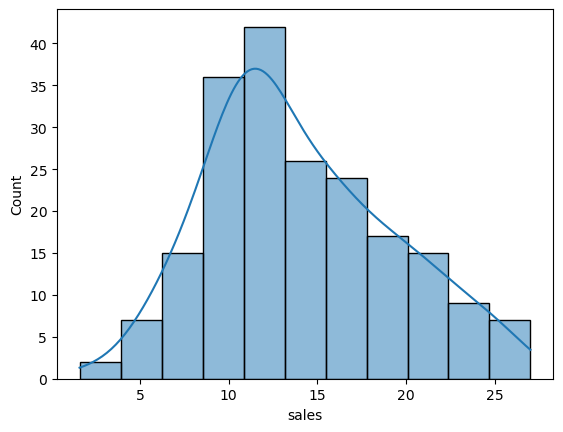

In [75]:
sns.histplot(df['sales'],kde=True)

# Bivariate analysis with sales

<Axes: xlabel='TV', ylabel='sales'>

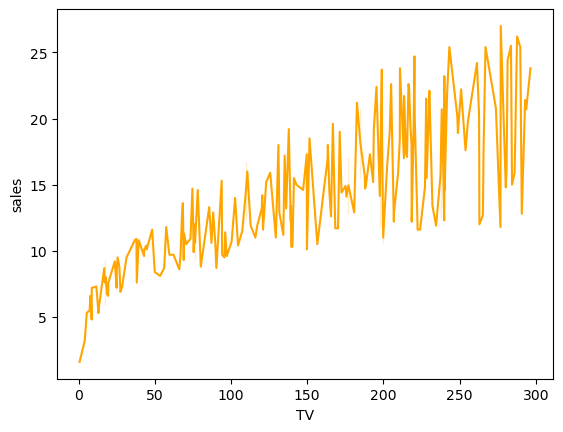

In [77]:
sns.lineplot(data=df,x=df['TV'],y=df['sales'], color='orange')

<Axes: xlabel='TV', ylabel='sales'>

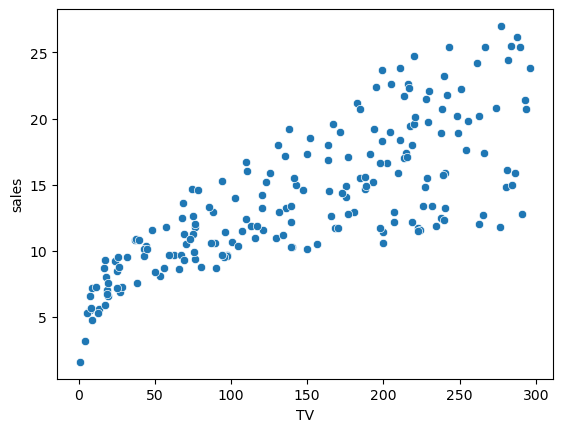

In [78]:
sns.scatterplot(data=df,x=df['TV'],y=df['sales'])

## Insights 
### positive correlation of tv with sales
### high noise at higher spending indicating other factors affect sales

<Axes: xlabel='radio', ylabel='sales'>

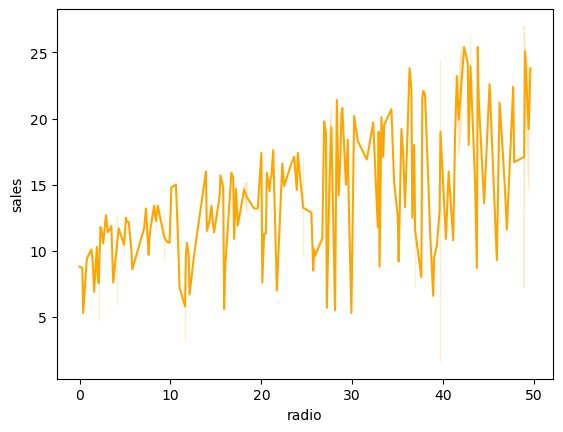

In [80]:
sns.lineplot(data=df,x=df['radio'],y=df['sales'], color = 'orange')

<Axes: xlabel='radio', ylabel='sales'>

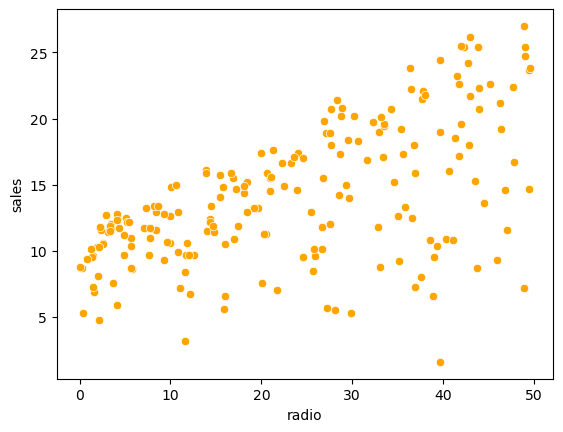

In [81]:
sns.scatterplot(data=df,x=df.radio,y=df.sales,color='orange')

# Insights
## show weak positive correlation with sales
## high noise indicating other factors affects and weak and unreliable relationship 

<Axes: xlabel='newspaper', ylabel='sales'>

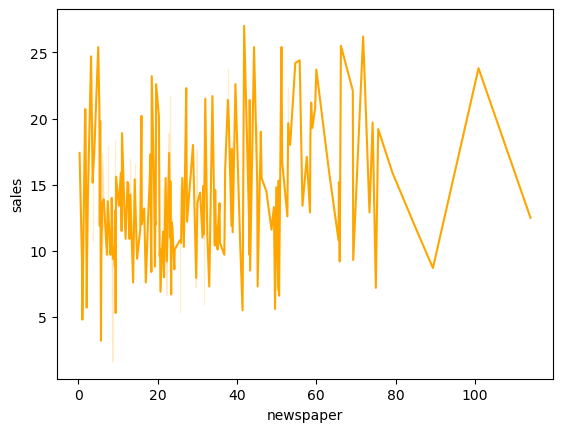

In [83]:
sns.lineplot(data=df,x=df['newspaper'],y=df['sales'],color='orange')

<Axes: xlabel='newspaper', ylabel='sales'>

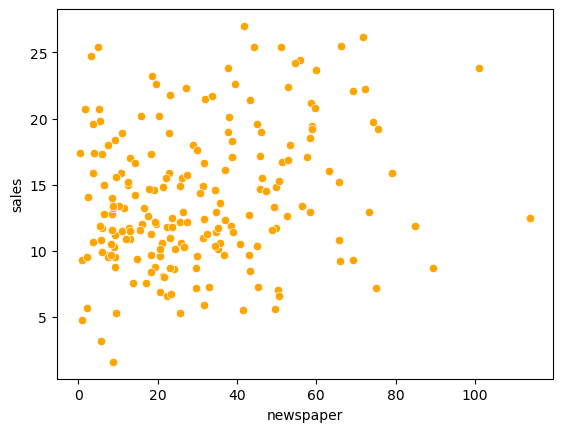

In [84]:
sns.scatterplot(data=df,x=df['newspaper'],y=df['sales'],color='orange')

# Insights
## no correlation between newspaper and sales

# Multivariate

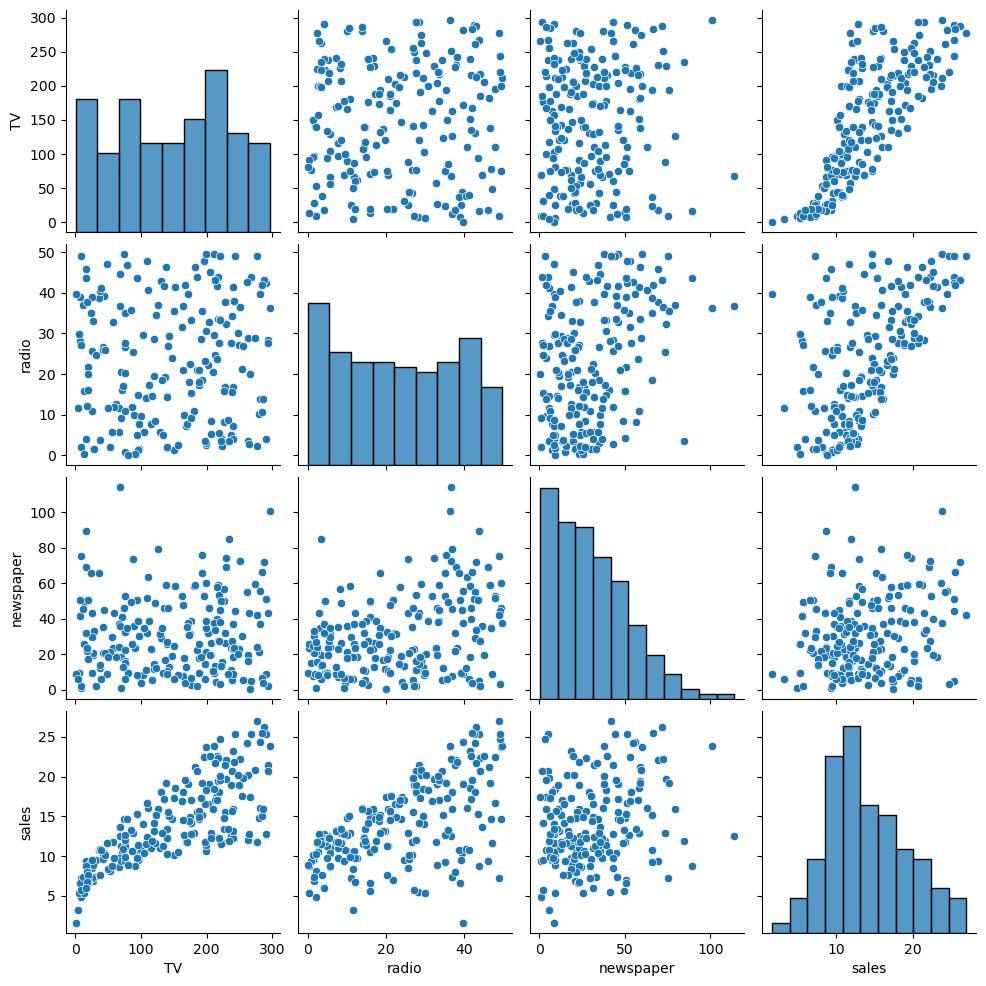

In [87]:
sns.pairplot(df)

# Data preprocessing

In [89]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [90]:
 df.duplicated().sum()

0

# Outliers

<Axes: xlabel='TV'>

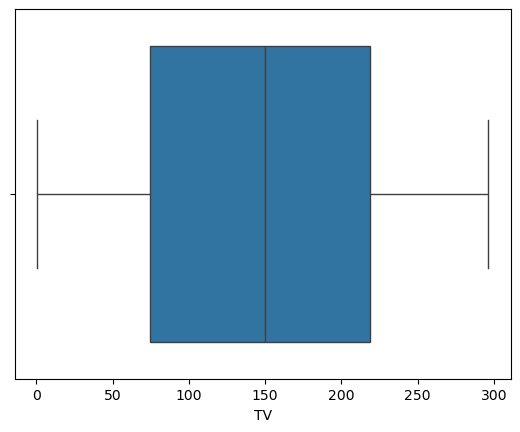

In [92]:
sns.boxplot(data=df,x=df['TV'])

<Axes: xlabel='radio'>

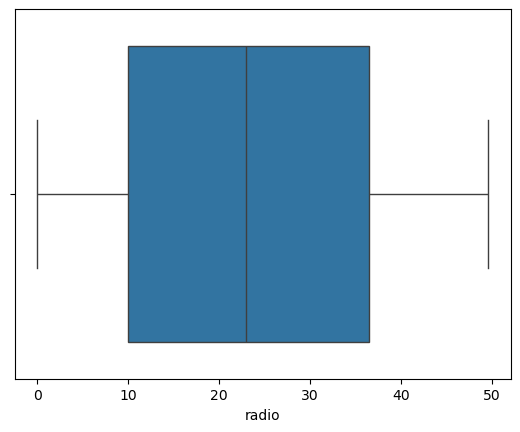

In [93]:
sns.boxplot(data=df,x=df['radio'])

<Axes: xlabel='newspaper'>

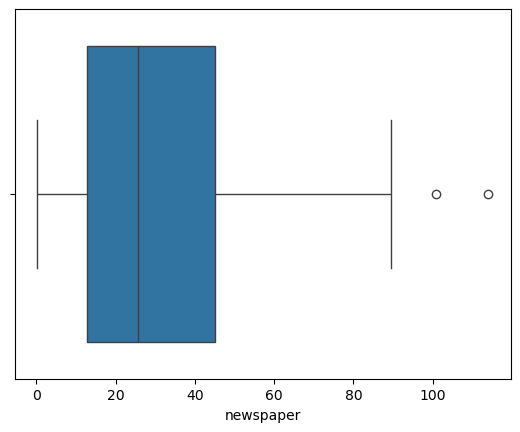

In [94]:
sns.boxplot(data=df,x=df['newspaper'])

## newspaper has outliers

In [96]:
q1=df['newspaper'].quantile(0.25)
q3=df['newspaper'].quantile(0.75)
iqr=q3-q1

ll=q1-1.5*iqr
ul=q3+1.5*iqr

In [97]:
ll

-35.775000000000006

In [98]:
ul

93.625

In [99]:
df.loc[df['newspaper']<ll]

,TV,radio,newspaper,sales


In [100]:
df.loc[df['newspaper']>ul]

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [101]:
len(df.loc[df['newspaper']>ul])/len(df)

0.01

In [102]:
df.loc[df['newspaper']>ul,'newspaper']=df['newspaper'].median()

In [103]:
df.loc[df['newspaper']>ul]

,TV,radio,newspaper,sales


<Axes: xlabel='newspaper'>

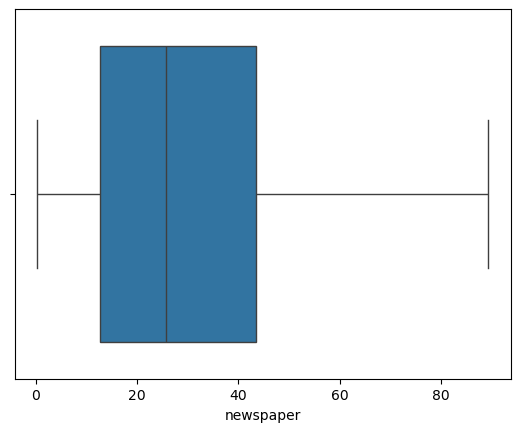

In [104]:
sns.boxplot(data=df,x=df.newspaper)

# Feature Engneering

In [150]:
#find corellation

In [152]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.048462,0.782224
radio,0.054809,1.000000,0.343141,0.576223
newspaper,0.048462,0.343141,1.000000,0.215938
sales,0.782224,0.576223,0.215938,1.000000


<Axes: >

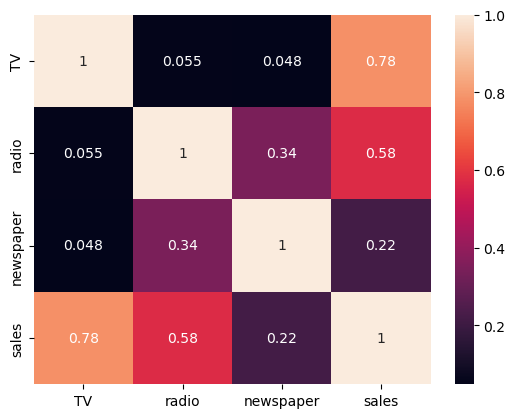

In [154]:
sns.heatmap(df.corr(),annot=True)

# Insights
## Newspaper has very less corr with sales
## TV has highest corr with sales
## Radio has corr with sales
## no mukticolinearility
## Can drop newspapercolumn if causes noise

# train and test

In [161]:
x=df.drop('sales',axis=1)
y=df.sales

In [163]:
from sklearn.model_selection import train_test_split

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [167]:
x_train.shape

(140, 3)

In [169]:
x_test.shape

(60, 3)

# Model Building

In [172]:
from sklearn.linear_model import LinearRegression


In [174]:
model=LinearRegression()

In [176]:
model.fit(x_train,y_train)

LinearRegression()

In [178]:
predict=model.predict(x_test)

In [182]:
predict

array([17.11920196, 16.86343137, 21.80867738, 24.55443423, 12.3155194 ,
       20.92742165, 10.10412313, 12.37902465, 11.99570844, 16.95369111,
       22.81007152, 15.1981792 ,  8.4657263 , 14.88506108, 18.54549016,
       18.5612111 , 18.70116245, 14.50770633,  9.74439917, 20.58825997,
       14.89035187, 17.71204411, 23.05479076,  7.72066599, 21.4435882 ,
       19.61759881, 13.81348356, 11.64299601, 18.42933279, 12.21072397,
       11.41183731,  9.96393166, 13.49958752, 15.19317807, 18.10601562,
        6.92406996, 14.20072023, 14.27620674, 14.10646271, 10.77352628,
       14.84385103, 11.94916737, 10.70309421, 10.40075312,  6.20529208,
       16.82109527, 16.46119818, 12.07762468, 10.73444639, 20.86473587,
       15.08126005, 15.41063402, 12.79667983, 14.11738167, 12.36964978,
        9.02390838, 20.50392858,  9.34145403,  5.36475925,  8.24787047])

In [184]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
89     16.7
48     14.8
116    12.2
12      9.2
69     22.3
110    13.4
154    15.6
16     12.5
19     14.6
2       9.3
143    10.4
185    22.6
29     10.5
155     3.2
24      9.7
Name: sales, dtype: float64

In [188]:
model.coef_

array([0.04539939, 0.17757031, 0.00502354])

In [190]:
model.intercept_

3.090172035290916

In [194]:
model.predict([[1000,3,2]])

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49.0323171])

# Model Evaluation

In [197]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error , root_mean_squared_error

In [199]:
rmse=root_mean_squared_error(y_test,predict)

In [201]:
rmse

1.484735205573377

In [203]:
mse=mean_squared_error(y_test,predict)

In [205]:
mse

2.2044386306690176

In [207]:
mae=mean_absolute_error(y_test,predict)
mae

1.1992980850475554

In [209]:
r2=r2_score(y_test,predict)

In [211]:
r2

0.9134809669573123